<a href="https://colab.research.google.com/github/elangbijak4/Quantum_Security_Research/blob/main/Demo2_Protokol_Quantum_Key_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Catatan: Protokol ini walaupun membungkus informasi ke dalam qubit (state kuantum) akan tetapi secara hakiki masih seluruhnya berjalan di atas kanal komunikasi klasik. Ini karena dua proses komunikasi yang berdampingan, proses pertama proses transmisi informasi dengan qubit dilakukan Alice dengan enkoding informasi pada qubit foton, kemudian foton dikirim dalam kanal komunikasi klasik kepada Bob. Misal melalui fiber optik atau pengiriman foton lainnya yang dibatasi oleh kecepatan cahaya (klasik). Proses kedua juga klasik karena Alice dan Bob saling berbagi operator kuantum untuk menemukan kunci melalui kanal klasik (misal Alice menelpon Bob).

In [ ]:
!pip install cirq

In [3]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
from IPython.display import display

In [4]:
def random_bits(n):
    return np.random.randint(2, size=n)

def random_bases(n):
    return np.random.randint(2, size=n)

def encode_message(bits, bases):
    qubits = [cirq.GridQubit(0, i) for i in range(len(bits))]
    circuit = cirq.Circuit()

    for i, (bit, base) in enumerate(zip(bits, bases)):
        if bit == 1:
            circuit.append(cirq.X(qubits[i]))
        if base == 1:
            circuit.append(cirq.H(qubits[i]))

    return qubits, circuit

def measure_message(qubits, bases):
    circuit = cirq.Circuit()

    for i, base in enumerate(bases):
        if base == 1:
            circuit.append(cirq.H(qubits[i]))
        circuit.append(cirq.measure(qubits[i], key=f'q{i}'))

    return circuit

def simulate(circuit):
    simulator = cirq.Simulator()
    result = simulator.run(circuit)
    return result

# Simulate BB84 protocol
n = 10  # Number of qubits

# Step 1: Alice creates random bits and bases
alice_bits = random_bits(n)
alice_bases = random_bases(n)

# Step 2: Alice encodes her bits
qubits, alice_circuit = encode_message(alice_bits, alice_bases)

# Step 3: Bob chooses random bases
bob_bases = random_bases(n)

# Step 4: Bob measures the received qubits
bob_circuit = measure_message(qubits, bob_bases)

# Combine Alice's and Bob's circuits
full_circuit = alice_circuit + bob_circuit
print("Circuit:")
print(full_circuit)

# Step 5: Simulate the circuit
result = simulate(full_circuit)
print("Results:")
print(result)

# Extract Bob's measurements
bob_bits = [result.measurements[f'q{i}'][0] for i in range(n)]

# Step 6: Alice and Bob compare bases and extract the key
key = [alice_bits[i] for i in range(n) if alice_bases[i] == bob_bases[i]]
print("Alice's bits:", alice_bits)
print("Alice's bases:", alice_bases)
print("Bob's bases:", bob_bases)
print("Bob's bits:", bob_bits)
print("Key:", key)

Circuit:
(0, 0): ───X───H───M('q0')─────────────

(0, 1): ───X───H───M('q1')─────────────

(0, 2): ───────────H─────────M('q2')───

(0, 3): ───────────M('q3')─────────────

(0, 4): ───X───────M('q4')─────────────

(0, 5): ───────────H─────────M('q5')───

(0, 6): ───X───────M('q6')─────────────

(0, 7): ───X───H───H─────────M('q7')───

(0, 8): ───H───────M('q8')─────────────

(0, 9): ───H───────H─────────M('q9')───
Results:
q0=1
q1=0
q2=1
q3=0
q4=1
q5=0
q6=1
q7=1
q8=1
q9=0
Alice's bits: [1 1 0 0 1 0 1 1 0 0]
Alice's bases: [1 1 0 0 0 0 0 1 1 1]
Bob's bases: [0 0 1 0 0 1 0 1 0 1]
Bob's bits: [array([1], dtype=int8), array([0], dtype=int8), array([1], dtype=int8), array([0], dtype=int8), array([1], dtype=int8), array([0], dtype=int8), array([1], dtype=int8), array([1], dtype=int8), array([1], dtype=int8), array([0], dtype=int8)]
Key: [0, 1, 1, 1, 0]


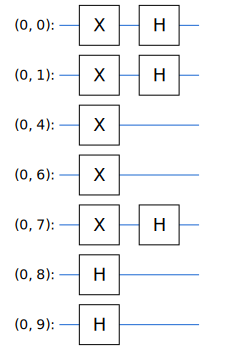

In [7]:
# Draw the circuit as SVG and display it
svg_circuit = SVGCircuit(alice_circuit)
display(svg_circuit)

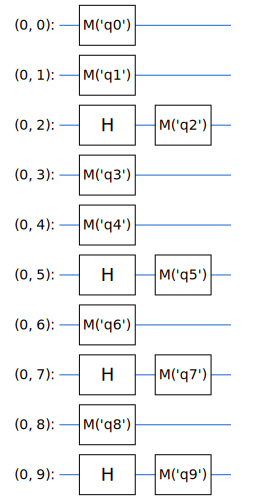

In [8]:
# Draw the circuit as SVG and display it
svg_circuit = SVGCircuit(bob_circuit)
display(svg_circuit)

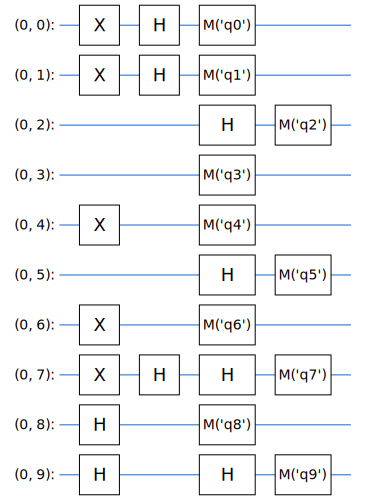

In [5]:
# Draw the circuit as SVG and display it
svg_circuit = SVGCircuit(full_circuit)
display(svg_circuit)